# Lecture des données depuis HDFS, Dépôt des données dans un schéma HBase 

In [1]:
import pyspark
from pyspark import SparkConf,SparkContext


## Configuration 

In [2]:
conf = pyspark.SparkConf().setAll([('spark.executor.memory', '8g'), ('spark.executor.cores', '3'), ('spark.cores.max', '3'), ('spark.driver.memory','8g')])

sc = pyspark.SparkContext(conf=conf)

sqlContext = pyspark.SQLContext(sc)


## Read data from HDFS

In [3]:
#data00 = sqlContext.read.json("hdfs://172.17.0.3:8020/user/root/ProjetFinal/teleCoroFr/data_CoronaWork_dict.json")

In [4]:
data_spark = sqlContext.read.option("header", "true").option("delimiter", ",").csv("hdfs://172.17.0.3:8020/user/root/ProjetFinal/teleCoroFr/data_CoronaWork_CSV_Clean_with_Encodage1.csv")

In [5]:
data_spark.collect()

[Row(Avis_efficacite_travail_confine='2', lieu_confinement='Dans votre résidence secondaire', variation_temps_travail_conf='3', nbre_personne_dans_lieu_conf='2.0', efficacite_consignes_teletravaildonne_par_employeur='3', progression_sur_outils_collaboratifs='Un peu', age='71.0', eval_suivi_actualite='3', frequence_sortir_en_semaine='Une fois par jour', eval_frequence_interaction_avec_collegues_enconf='3', evaluation_condition_travail_avant_conf='4', Consequence_negatives_teletravailconfines="La communication avec vos collègues est moins fluide,Vous vous sentez isolé.e,C'est difficile de se concentrer", impact_confinnement_relations_avec_confines='Oui, on est plus proches', nature_travail='Travailler en équipe', nbre_enfants_moins_12='0.0', eval_contact_avec_famille='2', isolation_pour travailler='Oui', evaluation_concentration_enconf='2', avantage_teletravail_confin='Vous dormez mieux', fréquence_téletravail_avant_conf='1 fois par semaine', reamenagement_heures_travails_habituels='Non'

In [6]:
data_pd=data_spark.toPandas()

In [7]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 63 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Avis_efficacite_travail_confine                      1489 non-null   object
 1   lieu_confinement                                     1489 non-null   object
 2   variation_temps_travail_conf                         1489 non-null   object
 3   nbre_personne_dans_lieu_conf                         1489 non-null   object
 4   efficacite_consignes_teletravaildonne_par_employeur  1489 non-null   object
 5   progression_sur_outils_collaboratifs                 1489 non-null   object
 6   age                                                  1489 non-null   object
 7   eval_suivi_actualite                                 1489 non-null   object
 8   frequence_sortir_en_semaine                          1489 non-null   object
 9

In [8]:
data_pd.describe()

Avis_efficacite_travail_confine     lieu_confinement  \
count                             1489                 1489   
unique                               5                   15   
top                                  3  Dans votre domicile   
freq                               592                 1292   

       variation_temps_travail_conf nbre_personne_dans_lieu_conf  \
count                          1489                         1489   
unique                            5                           10   
top                               3                          2.0   
freq                            535                          514   

       efficacite_consignes_teletravaildonne_par_employeur  \
count                                                1489    
unique                                                  5    
top                                                     4    
freq                                                  657    

       progression_sur_outils_collaboratifs   age eval_suivi_actualite  \
count                                  1489  1489                 1489   
unique                                    4    55                    5   
top     Non, je les utilisais déjà beaucoup  27.0                    3   
freq                                    599    80                  534   

              frequence_sortir_en_semaine  \
count                                1489   
unique                                  5   
top     Une fois dans la semaine ou moins   
freq                                  714   

       eval_frequence_interaction_avec_collegues_enconf  ...  \
count                                              1489  ...   
unique                                                5  ...   
top                                                   3  ...   
freq                                                423  ...   

       reamenagement_heures_travails_habituels_num  \
count                                         1489   
unique                                           5   
top                                              3   
freq                                           652   

       inquiet_sur_perennite_acauseCovid_num taille_entreprise_num  \
count                                   1489                  1489   
unique                                     4                     7   
top                                        2                     5   
freq                                     860                   387   

       aimer_continuer_teltravail_enfutur_num  \
count                                    1489   
unique                                      5   
top                                         4   
freq                                      637   

       tempstransport_maison_entreprise_num statut_professionnel_num  \
count                                  1489                     1489   
unique                                    4                       56   
top                                       0                        9   
freq                                    575                     1052   

       genre_num acces_surface_exterieur_num nbre_personne_symptem_covid_num  \
count       1489                        1489                            1489   
unique         2                           4                               4   
top            1                           1                               0   
freq         874                         717                             706   

       statut_familial_num  
count                 1489  
unique                   4  
top                      2  
freq                  1006  

[4 rows x 63 columns]

# Histogramme

In [9]:
def histogram_graphe(colonne,xaxis=1 ,yaxis = 1):
    # Répartition des départements
    nb_per_col = colonne.value_counts()


    # ----------------------------------------------------------
    nb_per_col.plot.barh() 
    

## Efficacité

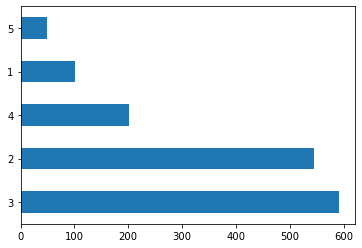

In [10]:
histogram_graphe(data_pd['Avis_efficacite_travail_confine'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## variation_temps_travail_conf

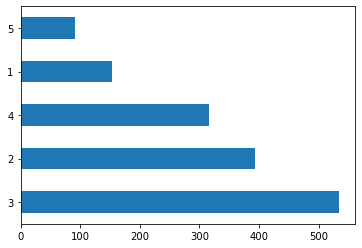

In [11]:
histogram_graphe(data_pd['variation_temps_travail_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## nbre_personne_dans_lieu_conf

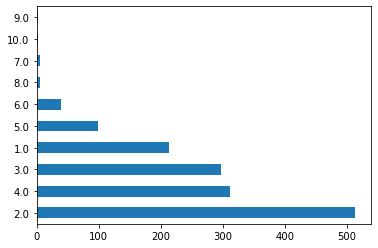

In [12]:
histogram_graphe(data_pd['nbre_personne_dans_lieu_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## efficacite_consignes_teletravaildonne_par_employeur

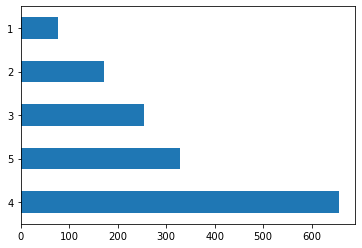

In [13]:
histogram_graphe(data_pd['efficacite_consignes_teletravaildonne_par_employeur'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## eval_frequence_interaction_avec_collegues_enconf

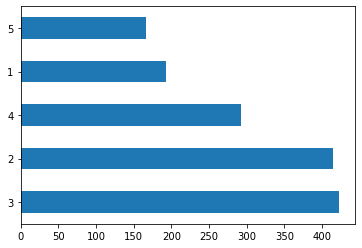

In [14]:
histogram_graphe(data_pd['eval_frequence_interaction_avec_collegues_enconf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## evaluation_condition_travail_avant_conf

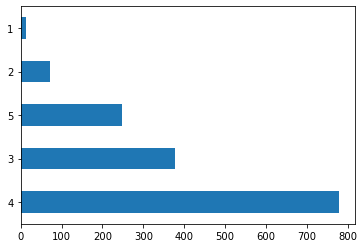

In [15]:
histogram_graphe(data_pd['evaluation_condition_travail_avant_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## nbre_enfants_moins_12

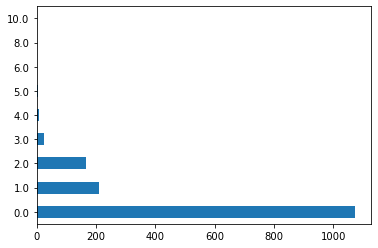

In [16]:
histogram_graphe(data_pd['nbre_enfants_moins_12'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## eval_contact_avec_famille

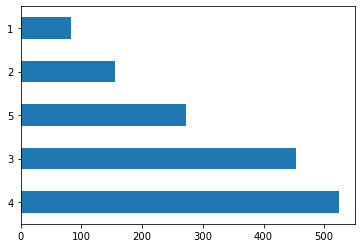

In [17]:
histogram_graphe(data_pd['eval_contact_avec_famille'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## evaluation_manger

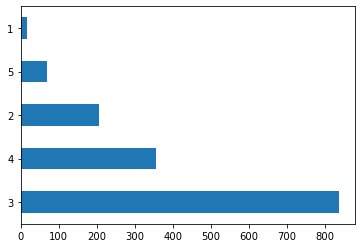

In [18]:
histogram_graphe(data_pd['evaluation_manger'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## evaluatuin_boire_alcool

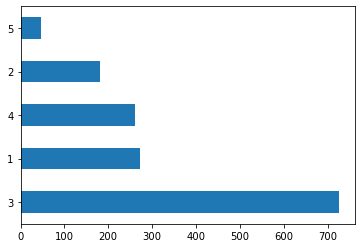

In [19]:
histogram_graphe(data_pd['evaluatuin_boire_alcool'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## evaluation_condition_travail_apres_debut_conf

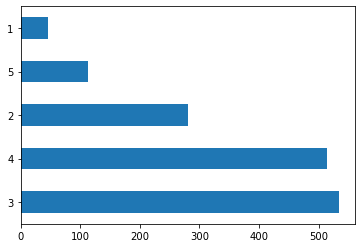

In [20]:
histogram_graphe(data_pd['evaluation_condition_travail_apres_debut_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## activite_sportif

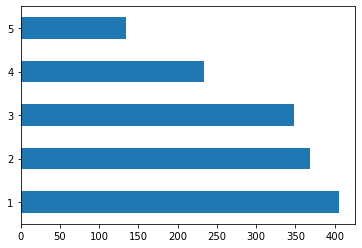

In [21]:
histogram_graphe(data_pd['activite_sportif'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## soin_apparence_en_conf

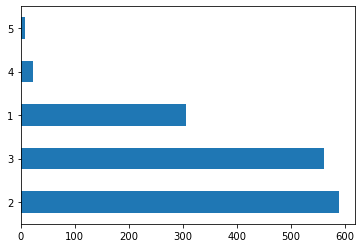

In [22]:
histogram_graphe(data_pd['soin_apparence_en_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## satisfaction_equipement_bureautique

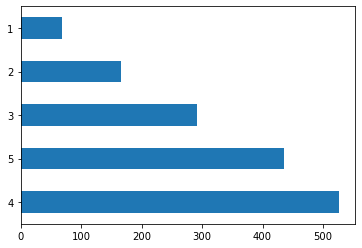

In [23]:
histogram_graphe(data_pd['satisfaction_equipement_bureautique'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## eval_bien_etre_apres_conf

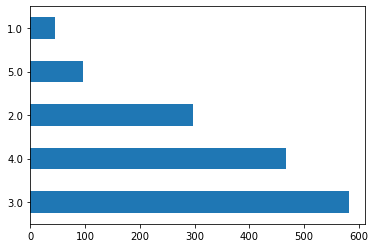

In [24]:
histogram_graphe(data_pd['eval_bien_etre_apres_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## eval_bien_etre_avant_conf

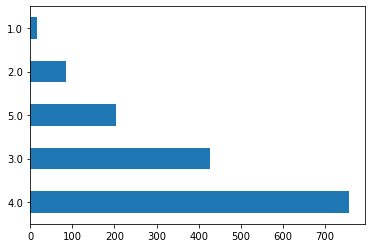

In [25]:
histogram_graphe(data_pd['eval_bien_etre_avant_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

In [27]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 63 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Avis_efficacite_travail_confine                      1489 non-null   object
 1   lieu_confinement                                     1489 non-null   object
 2   variation_temps_travail_conf                         1489 non-null   object
 3   nbre_personne_dans_lieu_conf                         1489 non-null   object
 4   efficacite_consignes_teletravaildonne_par_employeur  1489 non-null   object
 5   progression_sur_outils_collaboratifs                 1489 non-null   object
 6   age                                                  1489 non-null   object
 7   eval_suivi_actualite                                 1489 non-null   object
 8   frequence_sortir_en_semaine                          1489 non-null   object
 9

In [31]:
L=list(data_pd)

In [ ]:
for elt in L:
    histogram_graphe(data_pd[elt])
    

Avis_efficacite_travail_confine


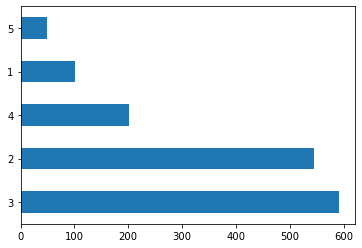

In [37]:
histogram_graphe(data_pd[L[0]])
print(L[0])

lieu_confinement


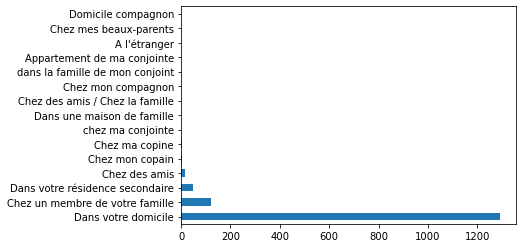

In [38]:
histogram_graphe(data_pd[L[1]])
print(L[1])

variation_temps_travail_conf


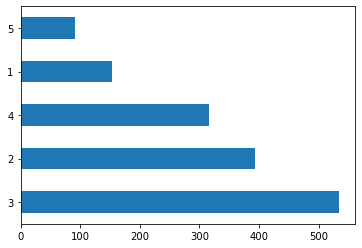

In [39]:
histogram_graphe(data_pd[L[2]])
print(L[2])

nbre_personne_dans_lieu_conf


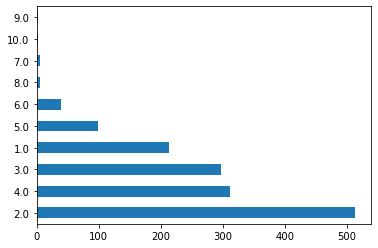

In [40]:
histogram_graphe(data_pd[L[3]])
print(L[3])